# Capstone Project - Predicting User Sentiments-Problem Analyisis

### Business Problem
##### (A description of the problem and a discussion of the background)

You are hired as a data scientist by a restaurant chain (probably the most prestigious) to tune the business based on customer review.  It is found that recently there is a decline of 5% in the revienue in the last quarter. The restaurant management want to analyze the current situation and see what the individual customer feel about the restaurant. 

The Restaurant management decided to give a bonus point for their customer if they give a review (good or bad) in foursquare website in their venue in the chain of business. 

As there are many outlets and many thousands of users for the restaurants looking at each comment and review is not possible. So, as a data scientist, you are asked to prepare a model to predict if the user is happy or unhappy based on the comments without reading each and every line in it. 

The management also want to see what are the main keyword in the review (positive and negative) based on which the management can take actions.



### Summary of Our Solution 
##### (A description of the data and how it will be used to solve the problem)

### Overview of the solution

A robust prediction model need to be prepared based on the available reviews and scroes that is available. The avaialable soruce for sentiments and its rating need to be reliable. Once we recive the data(in our case we got a <b>keggle dataset</b>), the data need to be analyzed and make sure that we have enough data to try with.
    
Once we get the data, we do cleaning, remove stop words and vectorize it so that we can apply different machine learning algorithms. In our case, we use a classification algorithm to classify the comments from 1 - 3. 

Based on the words, we can find different words which can be identified as bad reviws and make some special care about those cases. 

Once we prepare the model, we could use the model to find the specific venue in the foursqure and find the recent user comments. Also check if the user comments are positive or negative. If they are negative, take special care and make necessary actions to rectify those bad reviews based on the keywords used in the review. 
 
We use sentiment analysis in scilearn to make a predictive model in order to see if the user review is positive, negative, or nutral.

We will use the available sentiments from different restaurants to train the model. Based on the trained model, we will test the prediction based on sample test data. once the testing is found successful, we will use the new reviews from the user and give a score based on the trained model

The overall flow of the solution is as follows:

1. Get sentiments of hotels from the sources (foursquare / any other sources)
2. Train the model based on classification algorithms
3. Use **Foursquare** get the neiborhood and find the sentiments of the hotels
4. Use the **Foursquare** to get the texts and comments
5. Use the trained model for predicting the feeling of the user


<hr>

## 1. Data Preparation Stage

#### 1.1 importing data

First import necessary packages such as pandas, geocoer and HTTP Requests

In [33]:
import pandas as pd
import geocoder # import geocoder
import requests # library to handle requests
from nltk import *

#### 1.2 Now we need to find the dataset for training the sentiments analysis

Initially we thought of getting the data from Foursquare, but it is found that the data for tips is premium category, so it has a limit to get the number of reviews.  

We have searched for different datasets for Indian context and found the data found a good one at https://www.kaggle.com/ranjitha1/hotel-reviews-city-chennai/version/2. This dataset is good for experimentation purpuse.

We use this dataset and downloaded to 'chennai_reviews.csv' and we read data to dataframe


In [34]:
def len_x(x):
    x = '' + str(x)
    return len(x)
    
df_all = pd.read_csv('chennai_reviews.csv')
df_all = df_all[['Hotel_name', 'Review_Title','Review_Text' ,'Sentiment','Rating_Percentage' ]]
df_all['txt_length'] = df_all['Review_Text'].apply(len_x)
df = df_all[df_all['Hotel_name'] == 'Accord Metropolitan']
df.head(3)

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage,txt_length
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100,74
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20,385
2,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,1,20,92


#### 1.1 EDA

Let's explore the data. Put some visualizaiton to see the insights of the data

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Use FacetGrid from the seaborn library to create histograms of text length based off of the  ratings.

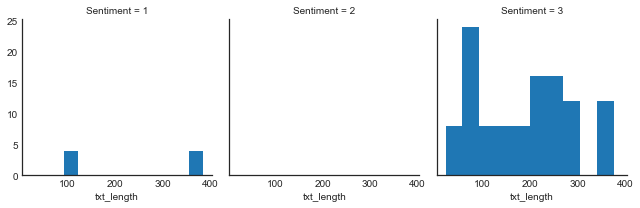

In [36]:
g = sns.FacetGrid(df,col='Sentiment')
g.map(plt.hist,'txt_length')

Creating a boxplot of text length for rating

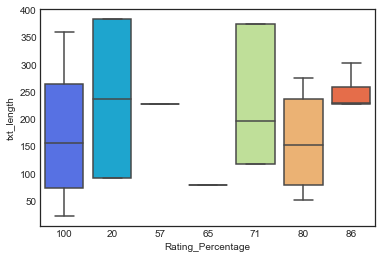

In [37]:
sns.boxplot(x='Rating_Percentage',y='txt_length',data=df,palette='rainbow')

Now check the size of the text and analyse the mean, std and other statistical aspects of the text data

In [38]:
df.describe()

,txt_length
count,124.000000
mean,193.258065
std,102.558480
min,22.000000
25%,80.000000
50%,214.000000
75%,266.000000
max,385.000000


Creating a countplot of the number of occurrences for each type of star rating.

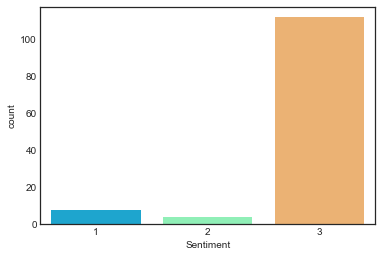

In [39]:
sns.countplot(x='Sentiment',data=df,palette='rainbow')

## 2. Sentiments  Analysis - Classification 

#### 2.1 First we need to do the clean-up 
Clean up activities include processing stop words, removing repeating words and further cleanup of punctuations and meaningless words

In [ ]:
# Importing and downloading the stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

#### 2.2 Check the stop words processing
Make sure that the stop words are working and prepare the methods for processing the stop words and punctuations. We'll also remove very common words, ('the', 'a', etc..).

In [41]:
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

#### 2.3 Text Pre-processing

The classification algorithms need numerical feature vector in order to perform the classification task.

In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

Let's create a function that will process the string in the message column, then we can just use apply() in pandas and then remove punctuation. 


In [45]:

import string
def clean_up_text(mess):
    """
    1. Remove punctuation
    2. Remove stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]



329


Bag-of-Words (bw_trans) takes care of the words processing. It transforms the entire dataframe with a reduced memory space etc. 

#### 2.4 Text  Normalization¶

Continue normalizing text. Such as Stemming or distinguishing by part of speech.

## 3 Vectorization

Now we need to convert messages to vector. We convert each message, represented as a list of tokens 


## 4. term frequency-inverse document frequency (TF-IDF)

TF-IDF is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.

## 5 Trining Model for Navie Bayes
#### 5.1 Selecting the classification scheme and training
We'll be using scikit-learn Naive Bayes classifier  in our scenario. The data is fit into the MultinomialNB class object


## 6: Text Analytics Model Evaluation

#### 6.1 Check the accuracy using the confusion matrix
Get the confusion matrix. As there are three values in the set, it is found all the values are correctly predicted without any false positives

## 7. Train Test Split 
Train Test Split of original data for actual training of model

## 8. Our Sentimental Model is ready 

Now in the following section, we will put the logic to use the model in the actual scenario of the hotel we are intereseted in. 

Now in the following sections, we will use the social networking data and utilize the fourquare APIs to get the sentiments of the users and see if they are in favor of the restaurant or not

## 9. Gather details on the hotel data

#### 9.2 Get the city cordniates
The following code is to get the list of cordniates to cross check. We are evaluating the cities of "UAE"

Note: <i>As there is a pickle file already created, no need of executing the following again
    


In [ ]:
results = requests.get(url).json()
df = pd.read_csv('https://datahub.io/core/world-cities/r/world-cities.csv')

df = df[df['country'] == 'United Arab Emirates']
df.rename(columns={'name': 'City', 'subcountry': 'Province'}, inplace=True)
df = df[['City','Province' ]]

In [ ]:

for index, row in df.iterrows():
    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates
    while(lat_lng_coords is None):
      g = geocoder.arcgis('{},{}, United Arab Emirates'.format(row['City'], row['Province']))
      lat_lng_coords = g.latlng

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    df.at[index, 'Latitude'] = latitude
    df.at[index, 'Longitude'] = longitude
    print(longitude,latitude, row['City'] )


## .....

#### 9.4 Visualize the map data 
Visualize the map data using the folium map library. All the interested locations are marked as bubbles in the map 

In [ ]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

map_address = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_address)  
    
map_address

## ...

##  10 Foursquire API for live sentiments 
We will get the details of the cities and interested location based on the query that we set. and then based on the interested location, we will gather the sentiments of specific location. 

#### 10.1 Data Scarping to get the required data
We first gather all the interesting venues with the <b>food</b> type. 
* We then save all the interesting places for analysis
* then we select the requred interested venue for focused study

**Now this section is the key and client id details requried for FourSqare API**

In [2]:
# Now this section is the key and client id details requried for FourSqare API
CLIENT_ID = '-----' # your Foursquare ID
CLIENT_SECRET = '----' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: -----
CLIENT_SECRET:----


#### 10.2 Check the API working 
Test the API with a random venue 

In [ ]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

city_latitude = df.loc[2, 'Latitude'] # neighborhood latitude value
city_longitude = df.loc[2, 'Longitude'] # neighborhood longitude value
#query = 'Hotel'
# type your answer here


#https://foursquare.com/explore?mode=url&near=Khobar%2C%20Saudi%20Arabia&nearGeoId=72057594038037259&q=starbucks

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&cat=food&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT)


## ....

Method to gather the venues iteratively

In [4]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&cat=food&client_secret={}&v={}&ll={},{}&radius={}&limit={}&q={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            city_latitude, 
            city_longitude, 
            radius, 
            LIMIT, 
            query)
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']             
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['id'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except ValueError:
            print('error',ValueError )
            
        # make the GET request
        
        
            


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'id', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
uae_venues = getNearbyVenues(names=df['City'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
uae_venues.to_pickle("./uae_city_venues.pkl")


## ....

##  11 Gather Sentiments

Now you gather sentiments for the intereted venues. IN our case we focus on the **Lulu Center** with Venue ID *"4d3057caa62d721ec754997d"* food center and see how the sentiments works for this food center 

In [8]:
import pandas as pd
uae_venues = pd.read_pickle("./uae_city_venues.pkl")
uae_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,id,Venue Latitude,Venue Longitude,Venue Category
0,Umm al Qaywayn,25.56473,55.55517,Lulu Center,4d3057caa62d721ec754997d,25.565576,55.552781,Shopping Mall
1,Umm al Qaywayn,25.56473,55.55517,Afandim Restaurant,5748496b498e451d7575e43e,25.562439,55.554600,Steakhouse
2,Umm al Qaywayn,25.56473,55.55517,China Mall Umm Al Quwain,5b40daa467f62b002cceed2c,25.561664,55.553554,Shopping Mall
3,Umm al Qaywayn,25.56473,55.55517,Cafe Sham,53667749498e51c1bfe0913d,25.563407,55.551682,Coffee Shop
4,Ras al-Khaimah,25.78953,55.94320,Lulu Center,4d3057caa62d721ec754997d,25.565576,55.552781,Shopping Mall


In [9]:
uae_venues.describe()

,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude
count,52.000000,52.000000,52.000000,52.000000
mean,25.163228,55.503446,25.563271,55.553154
std,0.531936,0.969814,0.001481,0.001078
min,24.110280,52.730560,25.561664,55.551682
25%,25.116410,55.392030,25.562245,55.552506
50%,25.331320,55.686350,25.562923,55.553167
75%,25.564730,56.272740,25.563949,55.553815
max,25.789530,56.341990,25.565576,55.554600


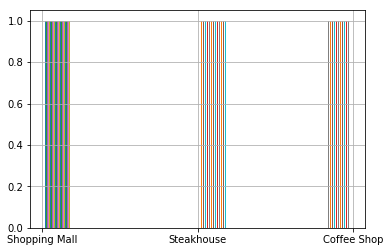

In [12]:
uae_venues['Venue Category'][:50].hist()

## 12. Using the Sentiments Predictions

Now this is the time to utilize the sentiments analytics model we created as a classification model based on Nave Bayes. We will now use the trained model based on the good quality dataset we got before. 

Optionally, we can gather more similar comments from Foursquare and update the training database 

## ...

In [ ]:
txt_from_foursquare = new_df['Review_Text']
new_predictions = pipeline.predict(txt_from_foursquare)


## ...

## 13 Analyze the result 

## ...

## ...

## ...

## ...

Thanks for reading ... **have a great day**! 